In [183]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [184]:
# Create a model class that inherits nn.Module

class model(nn.Module):
    #input layer (4 features of the flower) 
    # --> hidden layer 1(some no. of neurons) H1 
    # --> H2(some no. of neurons)
    # --> output(3 classes of iris flowers)

    def __init__(self, in_features=4,h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x

In [185]:
#pick a manual seed for randomization
torch.manual_seed(41)

#create an instance of the model

model =model()

In [186]:
import matplotlib.pyplot as plt
import pandas as pd

In [187]:
df=pd.read_html('https://gist.github.com/curran/a08a1080b88344b0c8a7',)

In [188]:
df1=df[1].drop('Unnamed: 0',axis=1)

In [189]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [190]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
encoded=ohe.fit_transform(df1[['species']]).toarray()

In [191]:
encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [192]:
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out())
encoded_df

,species_setosa,species_versicolor,species_virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [193]:
df2=pd.concat([df1,encoded_df],axis=1)

In [194]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,virginica,0.0,0.0,1.0


In [195]:
df2.drop('species',axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [196]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [197]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [198]:
df1['species']=encoder.fit_transform(df1['species'])

In [199]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [200]:
df1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [201]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [202]:
df1['species'].unique()

array([0, 1, 2])

In [203]:
df1['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [204]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [205]:
#train test split
X=df1.iloc[:,:-1]

In [206]:
y=df1.iloc[:,-1]

In [207]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [208]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [210]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [211]:
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)

In [212]:
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [213]:
X_train, X_test, y_train, y_test

(tensor([[5.7000, 2.6000, 3.5000, 1.0000],
         [6.5000, 2.8000, 4.6000, 1.5000],
         [4.9000, 2.5000, 4.5000, 1.7000],
         [5.5000, 2.6000, 4.4000, 1.2000],
         [6.7000, 3.0000, 5.2000, 2.3000],
         [5.8000, 4.0000, 1.2000, 0.2000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [6.9000, 3.1000, 5.4000, 2.1000],
         [5.9000, 3.2000, 4.8000, 1.8000],
         [6.2000, 2.9000, 4.3000, 1.3000],
         [5.7000, 2.8000, 4.5000, 1.3000],
         [5.2000, 4.1000, 1.5000, 0.1000],
         [6.5000, 3.0000, 5.8000, 2.2000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [5.7000, 3.8000, 1.7000, 0.3000],
         [6.7000, 2.5000, 5.8000, 1.8000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [4.8000, 3.0000, 1.4000, 0.3000],
         [6.2000, 2.2000, 4.5000, 1.5000],
         [6.4000, 2.7000, 5.3000, 1.9000],
         [5.8000, 2.7000, 3.9000, 1.2000],
         [7.4000, 2.8000, 6.1000, 1.9000],
         [5

In [ ]:
# error measure
import torch.optim.adam


criterion=nn.CrossEntropyLoss()

#optimizer
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [215]:
model.parameters

<bound method Module.parameters of model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [216]:
## train the model

epoch=500
losses=[]
for i in range(epoch):
    #go forward
    y_pred_train=model.forward(X_train)

    #measure the loss/error
    loss=criterion(y_pred_train,y_train)

    losses.append(loss.item())

    #print every 10 epochs

    if i%10==0:
        print(f"epoch: {i}, loss={loss.item()}")

    #back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    y_pred_train = model(X_train)
    predicted_classes = torch.argmax(y_pred_train, dim=1)
    correct = (predicted_classes == y_train).sum().item()
    total = y_train.size(0)
    train_accuracy = correct / total * 100
    print(f"\nFinal Training Accuracy: {train_accuracy:.2f}%")

epoch: 0, loss=1.1251550912857056
epoch: 10, loss=1.1094491481781006
epoch: 20, loss=1.0956318378448486
epoch: 30, loss=1.0833038091659546
epoch: 40, loss=1.071068525314331
epoch: 50, loss=1.0581412315368652
epoch: 60, loss=1.043951392173767
epoch: 70, loss=1.027901530265808
epoch: 80, loss=1.006042718887329
epoch: 90, loss=0.9842699766159058
epoch: 100, loss=0.9593889713287354
epoch: 110, loss=0.9310257434844971
epoch: 120, loss=0.8987038135528564
epoch: 130, loss=0.8625795841217041
epoch: 140, loss=0.8231237530708313
epoch: 150, loss=0.7819623351097107
epoch: 160, loss=0.7424018979072571
epoch: 170, loss=0.7054346203804016
epoch: 180, loss=0.6709554195404053
epoch: 190, loss=0.6387065052986145
epoch: 200, loss=0.6083163619041443
epoch: 210, loss=0.5795048475265503
epoch: 220, loss=0.5519545078277588
epoch: 230, loss=0.5248972177505493
epoch: 240, loss=0.4977360963821411
epoch: 250, loss=0.4708419740200043
epoch: 260, loss=0.44537779688835144
epoch: 270, loss=0.4227592647075653
epoch:

Text(0, 0.5, 'loss')

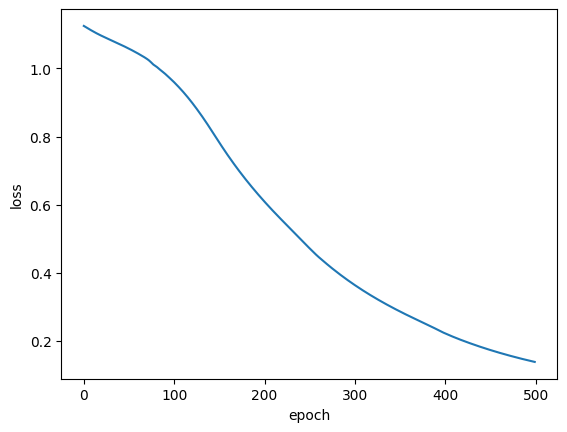

In [217]:
plt.plot(range(epoch),losses)
plt.xlabel('epoch')
plt.ylabel('loss')